In [104]:
import pandas as pd
import matplotlib.pyplot as plt

supreme = pd.read_csv('../data/supreme_1023.csv')

In [20]:
# Check for traditional binary variable

if supreme.decisionDirection.iloc[1] != 1.0:
    supreme.decisionDirection = supreme.decisionDirection - 1

<h3> Visuals - Liberal/Conservative Vote Ratio by Court

In [21]:
votes_subcourt = supreme.groupby('subCourt').decisionDirection.value_counts()

In [22]:
sc_list = []

for i, vote in enumerate(votes_subcourt.index):
    if votes_subcourt[i] > 150:
        sc_list.append(votes_subcourt.index[i][0])
        
vote_list = []

for i, vote in enumerate(votes_subcourt.index):
    if votes_subcourt[i] > 150:
        if votes_subcourt.index[i][1] == 0:
            vote_list.append('Conservative')
        if votes_subcourt.index[i][1] == 1:
            vote_list.append('Liberal')
            
count_list = []

for i, vote in enumerate(votes_subcourt.index):
    if votes_subcourt[i] > 150:
        count_list.append(votes_subcourt[i])

In [23]:
sc_list_17 = sc_list[-30:]
vote_list_17 = vote_list[-30:]
count_list_17 = count_list[-30:]

In [24]:
percent_count_list = []
for i, sc in enumerate(count_list_17):
    if i % 2 == 0:
        if i == 152:
            break
        else:
            number = count_list[i] / (count_list[i] + count_list[i+1])
            percent_count_list.append(number)
    else:
        number = count_list[i] / (count_list[i] + count_list[i-1])
        percent_count_list.append(number)
        
percent_count_list = [n*100 for n in percent_count_list]

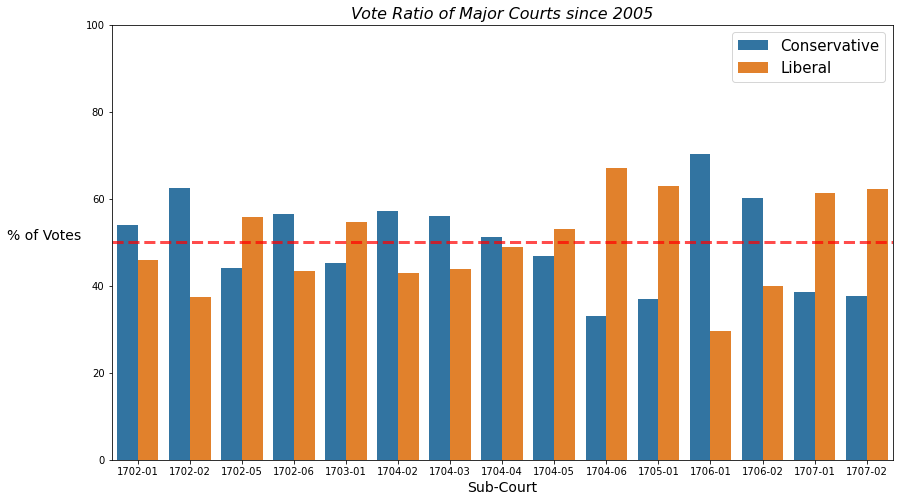

In [25]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(14,8))
plt.title('')
plt.ylim(0,100)
ax = sns.barplot(x=sc_list_17, y=percent_count_list, hue=vote_list_17)
plt.legend(prop={"size":15})
ax.set_title('Vote Ratio of Major Courts since 2005', fontsize=16, style='oblique')
ax.set_xlabel('Sub-Court', fontsize=14)
ax.set_ylabel('% of Votes', fontsize=14, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--');

plt.savefig('vote_ratio_since_2005')

<h3> Visuals - Liberal/Conservative Vote Ratio by Issue

In [443]:
votes_issue = supreme.groupby('issueArea').decisionDirection.value_counts()

In [444]:
sc_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        sc_list.append(votes_issue.index[i][0])
        
vote_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        if votes_issue.index[i][1] == 0:
                vote_list.append('Conservative')
        elif votes_issue.index[i][1] == 1:
                vote_list.append('Liberal')
            
count_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        count_list.append(votes_issue.iloc[i])

In [445]:
percent_count_list = []
for i, sc in enumerate(count_list):
    if i % 2 == 0:
        number = count_list[i] / (count_list[i] + count_list[i+1])
        percent_count_list.append(number)
    else:
        number = count_list[i] / (count_list[i] + count_list[i-1])
        percent_count_list.append(number)
        
percent_count_list = [n*100 for n in percent_count_list]

In [446]:
issues = ['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic Activity', 'Judicial Power', 'Federalism', 'Federal Taxation']

In [ ]:
plt.ylim(0,100)

sns.set(font='Georgia')
plt.legend(prop={"size":15})
ax.set_title('Supreme Court Issue Bias by Issue in {chief} Court ({min_year} - {max_year})\n'.format(chief=chief,
                                                                                            min_year=min_year,
                                                                                            max_year=max_year), 
             fontsize=22, style='oblique')
ax.set_xlabel('Issue', fontsize=20)
ax.set_ylabel('% of \n Votes', fontsize=20, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--')
ax.set_xticklabels(['Criminal \n Procedure', 'Civil Rights', 'First \n Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic \n Activity', 'Judicial \n Power', 'Federalism', 'Federal \n Taxation'], rotation=30, fontsize=16)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)

plt.savefig('Bias_by_Issue_in_{chief}_Court'.format(chief=chief))


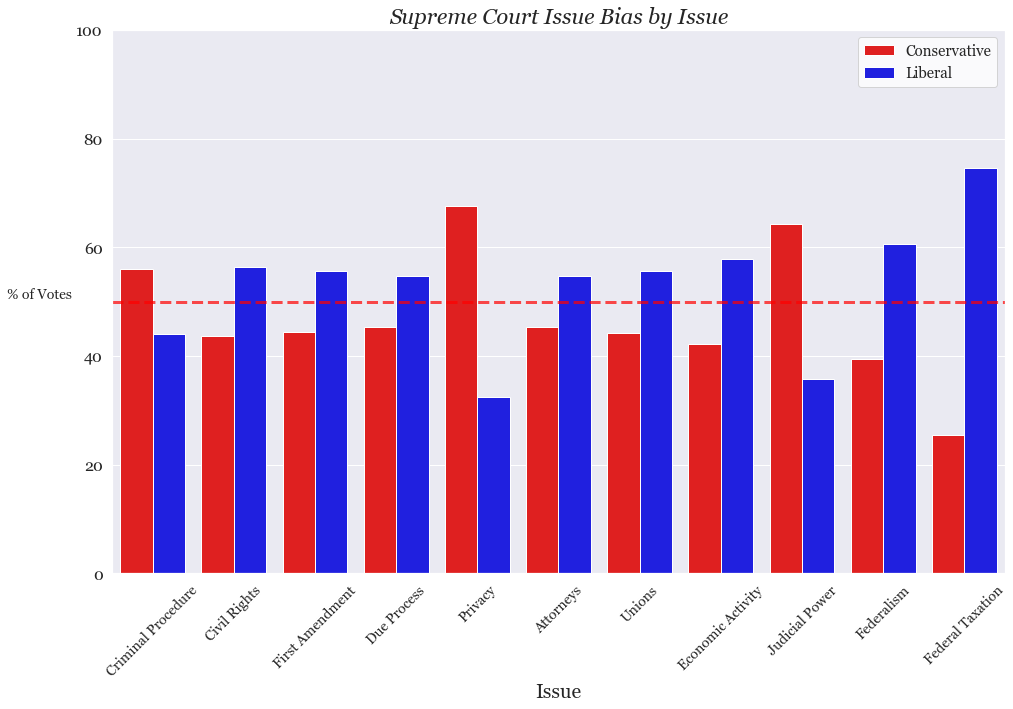

In [452]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(16,10))
plt.title('')
plt.ylim(0,100)
clrs = ['red' if x =='Conservative' else 'blue' for x in vote_list]
sns.set(font='Georgia')
ax = sns.barplot(x=sc_list, y=percent_count_list, hue=vote_list, palette=clrs)

plt.legend(facecolor='white', prop={"size":15})
ax.set_title('Supreme Court Issue Bias by Issue', fontsize=22, style='oblique')
ax.set_xlabel('Issue', fontsize=20)
ax.set_ylabel('% of Votes', fontsize=14, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--')
ax.set_xticklabels(['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic Activity', 'Judicial Power', 'Federalism', 'Federal Taxation'], rotation=45, fontsize=14)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)

plt.savefig('Bias_by_Issue')


<h3>Visuals - Liberal/Conservative Vote Ratio by Issue by CJ (for some reason this just won't work in a function...)

In [106]:
chiefs = supreme['chief'].unique()
chiefs

array(['Vinson', 'Warren', 'Burger', 'Rehnquist', 'Roberts'], dtype=object)

In [143]:
new_court = supreme[supreme['chief']== 'Warren']
chief = new_court['chief'].values[0]

In [144]:
votes_issue = new_court.groupby('issueArea').decisionDirection.value_counts()

In [145]:
new_court['chief'].values[0]

'Warren'

In [146]:
sc_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        sc_list.append(votes_issue.index[i][0])
        
vote_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        if votes_issue.index[i][1] == 0:
                vote_list.append('Conservative')
        elif votes_issue.index[i][1] == 1:
                vote_list.append('Liberal')
            
count_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        count_list.append(votes_issue.iloc[i])

In [147]:
# For CJ = Warren

if chief == 'Warren':
    percent_count_list = []
    for i, sc in enumerate(count_list):
        if i < 8:
            if i % 2 == 0:
                number = count_list[i] / (count_list[i] + count_list[i+1])
                percent_count_list.append(number)
            else:
                number = count_list[i] / (count_list[i] + count_list[i-1])
                percent_count_list.append(number)
        elif i == 8:
            percent_count_list.append(1)
        elif i > 8:
            if i % 2 == 0:
                number = count_list[i] / (count_list[i] + count_list[i-1])
                percent_count_list.append(number)
            else:
                number = count_list[i] / (count_list[i] + count_list[i+1])
                percent_count_list.append(number)   
else:
    percent_count_list = []
    for i, sc in enumerate(count_list):
        if i % 2 == 0:
            number = count_list[i] / (count_list[i] + count_list[i+1])
            percent_count_list.append(number)
        else:
            number = count_list[i] / (count_list[i] + count_list[i-1])
            percent_count_list.append(number)

        
percent_count_list = [n*100 for n in percent_count_list]

In [148]:
issues = ['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic Activity', 'Judicial Power', 'Federalism', 'Federal Taxation']

min_year = new_court['term'].min()
max_year = new_court['term'].max()

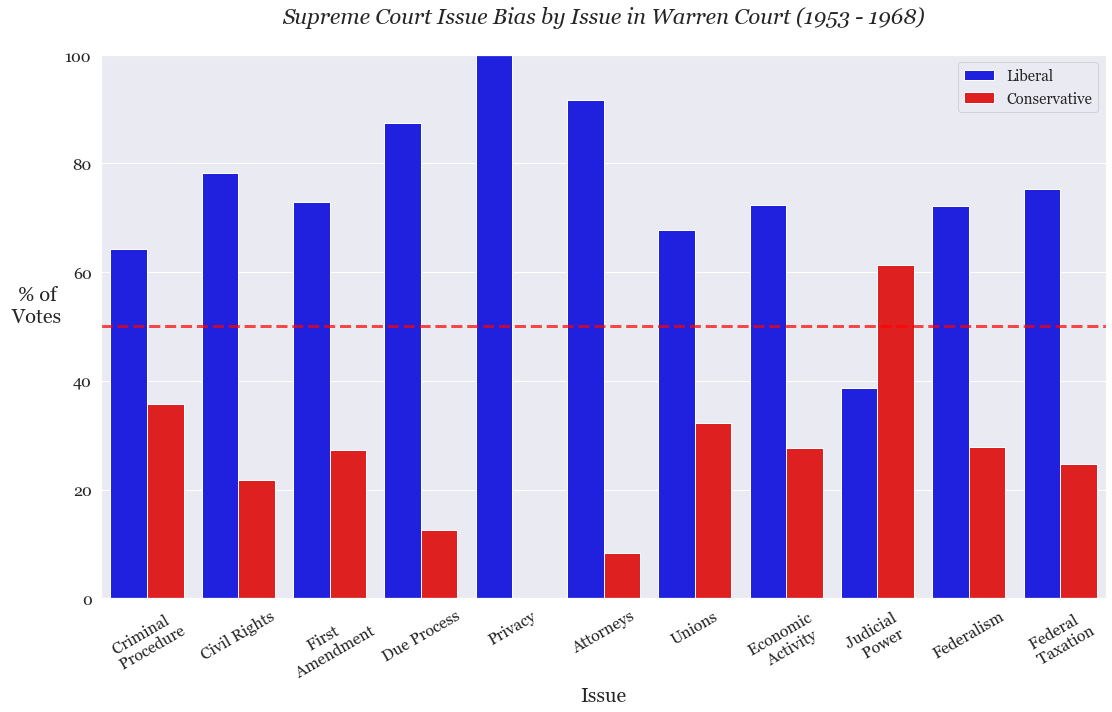

In [149]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(18,10))
plt.title('')
plt.ylim(0,100)
clrs = ['red' if x =='Conservative' else 'blue' for x in vote_list]
ax = sns.barplot(x=sc_list, y=percent_count_list, hue=vote_list, palette=clrs)
sns.set(font='Georgia')
plt.legend(prop={"size":15})
ax.set_title('Supreme Court Issue Bias by Issue in {chief} Court ({min_year} - {max_year})\n'.format(chief=chief,
                                                                                            min_year=min_year,
                                                                                            max_year=max_year), 
             fontsize=22, style='oblique')
ax.set_xlabel('Issue', fontsize=20)
ax.set_ylabel('% of \n Votes', fontsize=20, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--')
ax.set_xticklabels(['Criminal \n Procedure', 'Civil Rights', 'First \n Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic \n Activity', 'Judicial \n Power', 'Federalism', 'Federal \n Taxation'], rotation=30, fontsize=16)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)

plt.savefig('Bias_by_Issue_in_{chief}_Court'.format(chief=chief))


<h3> Visuals - Change of MQ over time

<h3>Exploring influence of court on decisions as a whole - PRESENTATION GRAPHIC

In [346]:
supreme[supreme['naturalCourt'] == 1301]['term'].min()

1946

In [10]:
# create list of unique natural courts

natural_courts = supreme['naturalCourt'].unique()

In [11]:
# create three lists: one with MQ by year, another with unique years, and another with a full list of possible MQ's

mq_by_term = supreme.groupby('term').mean()['subCourt_MQ']
unique_terms = supreme.term.unique()

unique_mq = supreme.subCourt_MQ.unique()

In [12]:
# function to find first year of a SCOTUS judges term 

event_year_list = []

for court in natural_courts:
    min_year = supreme[supreme['naturalCourt'] == court]['term'].min()
    event_year_list.append(min_year)

In [13]:
# create combination list of the Court MQ of each term 

event_year_list_unique = []
[event_year_list_unique.append(year) for year in event_year_list if year not in event_year_list_unique]
years_and_mq = zip(unique_terms, mq_by_term)
years_and_mq = list(years_and_mq)

event_mq_list = []

for n, year in enumerate(years_and_mq):
    for i, term in enumerate(event_year_list_unique):
        if years_and_mq[n][0] == event_year_list_unique[i]:
            event_mq_list.append(years_and_mq[n][1])

In [15]:
# list of coordinates to be interpreted in graph

event_coordinates = zip(event_year_list_unique,event_mq_list)
event_coordinates = list(event_coordinates)

In [399]:
# set list of years where a new Chief Justice was sworn in

cj_years = [1952,1968,1985,2004]
cj_mq = [4.204,-10.507,1.682,1.54]

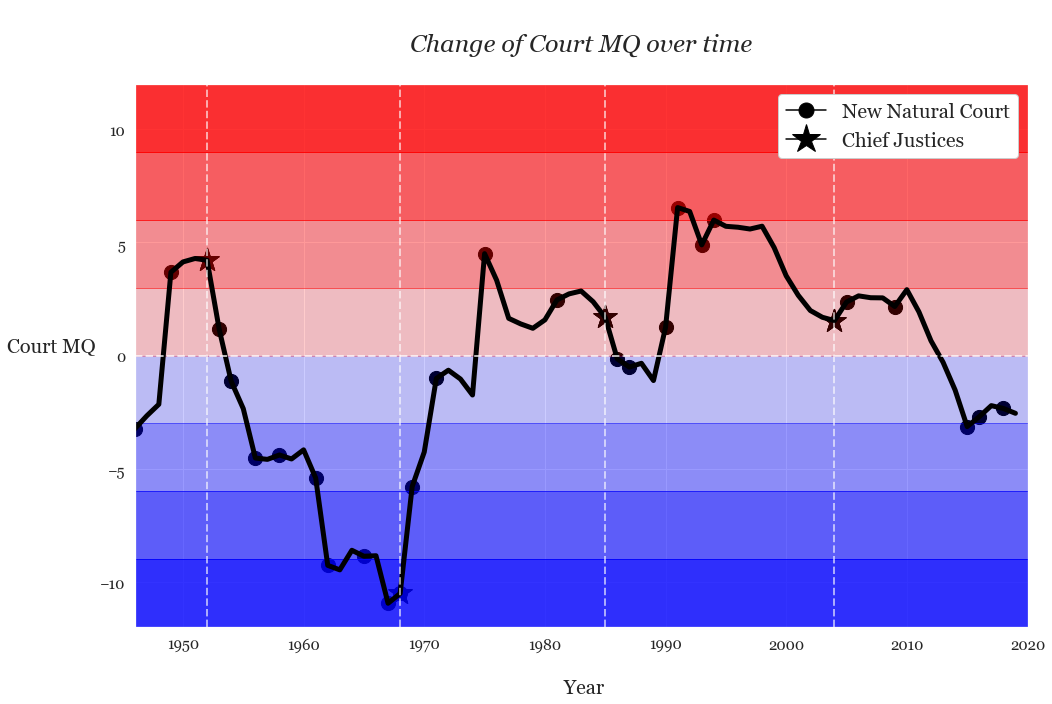

In [441]:
sns.set(font='Georgia')

import matplotlib.lines as mlines

black_star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=30, label='Chief Justices')
black_circle = mlines.Line2D([], [], color='black', marker='.',
                          markersize=30, label='New Natural Court')

plt.figure(figsize=(16,10))
leg = plt.legend(facecolor='white', handles=[black_circle, black_star], prop={"size":20}, framealpha=1)
    
plt.ylim(-12,12)
plt.xlim(1946,2020)
ax = sns.lineplot(x=unique_terms, y=mq_by_term, linewidth=5, color='black')
plt.scatter(x=event_year_list_unique, y=event_mq_list, s=200, c='black')


ax.set_title('\n Change of Court MQ over time \n', fontsize=25, style='oblique')
ax.set_xlabel('\n Year', fontsize=20)
ax.set_ylabel('Court MQ', fontsize=20, rotation = 0, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.axhline(y=0, linewidth=2, color='white', alpha=.7, linestyle='--')
ax.axhspan(-12,-9, color ='blue',alpha=.8)
ax.axhspan(-9,-6, color ='blue',alpha=.6)
ax.axhspan(-6,-3, color ='blue',alpha=.4)
ax.axhspan(-3,0, color='blue', alpha=.2)
ax.axhspan(0,3, color='red', alpha=.2)
ax.axhspan(3,6, color='red', alpha=.4)
ax.axhspan(6,9, color='red', alpha=.6)
ax.axhspan(9,12, color='red', alpha=.8)
ax.axvline(x=1952, linewidth=2, color='white', alpha=.6, linestyle='--')
ax.axvline(x=1968, linewidth=2, color='white', alpha=.6, linestyle='--')
ax.axvline(x=1985, linewidth=2, color='white', alpha=.6, linestyle='--')
ax.axvline(x=2004, linewidth=2, color='white', alpha=.6, linestyle='--')
ax.scatter(x=cj_years, y=cj_mq, s=600, c='black', marker='*')
ax.scatter(x=cj_years, y=cj_mq, s=600, c='black', marker='*')
ax.scatter(x=cj_years, y=cj_mq, s=600, c='black', marker='*')

;

plt.savefig('Court_MQ_over_time_by_Court')

<h3>Early Graph representing distribution of votes by issue

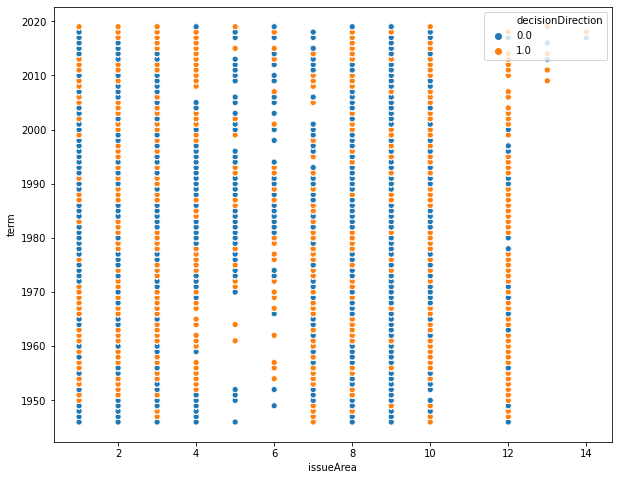

In [28]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(data=supreme, x='issueArea', y='term', hue='decisionDirection');